In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
credit = pd.read_csv('credit_risk_dataset.csv')

In [3]:
# EDA - EXPLORATORY DATA ANALYSIS
# Print the number of rows and columns in the DataFrame
print(f'The dataset contains: {credit.shape[0]} observations and {credit.shape[1]} features.')

The dataset contains: 32581 observations and 12 features.


In [4]:
# Save the features into a variable called 'columns'
columns = credit.columns
# Inspect features
columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length'],
      dtype='object')

In [5]:
# Number of unique values present in each column
for i in columns:
    print(i, '\t', len(credit[i].unique()))

person_age 	 58
person_income 	 4295
person_home_ownership 	 4
person_emp_length 	 37
loan_intent 	 6
loan_grade 	 7
loan_amnt 	 753
loan_int_rate 	 349
loan_status 	 2
loan_percent_income 	 77
cb_person_default_on_file 	 2
cb_person_cred_hist_length 	 29


In [6]:
# Inspect the first five rows of the dataset
credit.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [7]:
# Inspect data types and check for missing values in the dataset
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [10]:
# Ratio of missing values in the data set
credit_missing = pd.Series(data=[round(credit[i].isnull().sum() / len(credit) * 100, 2) for i in columns], index=columns)
credit_missing.sort_values(ascending=False)

loan_int_rate                 9.56
person_emp_length             2.75
person_age                    0.00
person_income                 0.00
person_home_ownership         0.00
loan_intent                   0.00
loan_grade                    0.00
loan_amnt                     0.00
loan_status                   0.00
loan_percent_income           0.00
cb_person_default_on_file     0.00
cb_person_cred_hist_length    0.00
dtype: float64

In [20]:
# Class Distribution
# Target feature --> credit['loan_status']
# True (1) -> Default - Loan re-payment Failed, False (0) -> Non-Default - Loan re-payment Successful
credit['loan_status'].value_counts()

0    25473
1     7108
Name: loan_status, dtype: int64

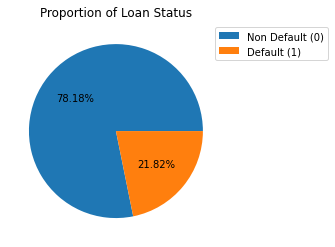

In [19]:
# Visualize class distribution
plt.pie(credit['loan_status'].value_counts(), autopct=lambda x: f'{round(x, 2)}%')
plt.title('Proportion of Loan Status')
plt.legend(['Non Default (0)', 'Default (1)'], bbox_to_anchor=(1.5, 1), loc='upper right')
plt.show()

In [21]:
credit.groupby('loan_status').mean()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
loan_status,,,,,,,
0,27.807129,70804.361559,4.968745,9237.464178,10.435999,0.148805,5.837475
1,27.474676,49125.652223,4.137562,10850.502954,13.060207,0.246889,5.685003
